In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from google.colab import files  



In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [4]:
mining_dataset = pd.read_csv('/drive/My Drive/mining_data.csv')

In [5]:
mining_dataset

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27,1.71
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27,1.71
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27,1.71
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71


In [6]:
mining_dataset.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [7]:
#drop duplicates
mining_dataset = mining_dataset.drop_duplicates()

In [8]:
#check for any null values
mining_dataset.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [9]:
#calculate the mean
mining_dataset['% Silica Concentrate'].mean()

2.327728351078574

In [10]:
#understand the data
mining_dataset.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,...,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000,245324.000000
mean,56.298531,14.648696,2869.738396,488.164884,397.569859,9.767218,1.680391,280.135095,277.135398,281.068434,...,290.760576,520.166834,522.554863,531.286960,420.159249,425.084901,429.878118,420.899360,65.048491,2.327728
std,5.161532,6.812201,1188.751636,90.758571,9.473704,0.387198,0.069171,29.628682,29.944170,28.549547,...,28.177921,130.457176,127.498760,150.700695,90.525264,83.543829,85.371879,83.742125,1.118551,1.125683
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,...,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2072.267000,432.248417,395.201333,9.526869,1.647263,250.268333,250.360583,250.689667,...,262.148167,413.457083,442.248583,410.068583,356.385010,357.024917,358.019250,356.511250,64.367380,1.440000
50%,56.080000,13.850000,2996.183333,504.478667,399.345034,9.797328,1.697537,299.415667,297.416833,299.048000,...,299.349333,492.866000,496.292167,494.747333,410.350500,407.899000,419.637333,409.907000,65.210000,2.000000
75%,59.720000,19.600000,3714.340833,553.568083,402.457598,10.037700,1.728307,300.125333,300.432750,300.305750,...,301.245000,594.944333,595.817500,601.084750,486.227083,485.270083,490.807667,475.573417,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,...,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


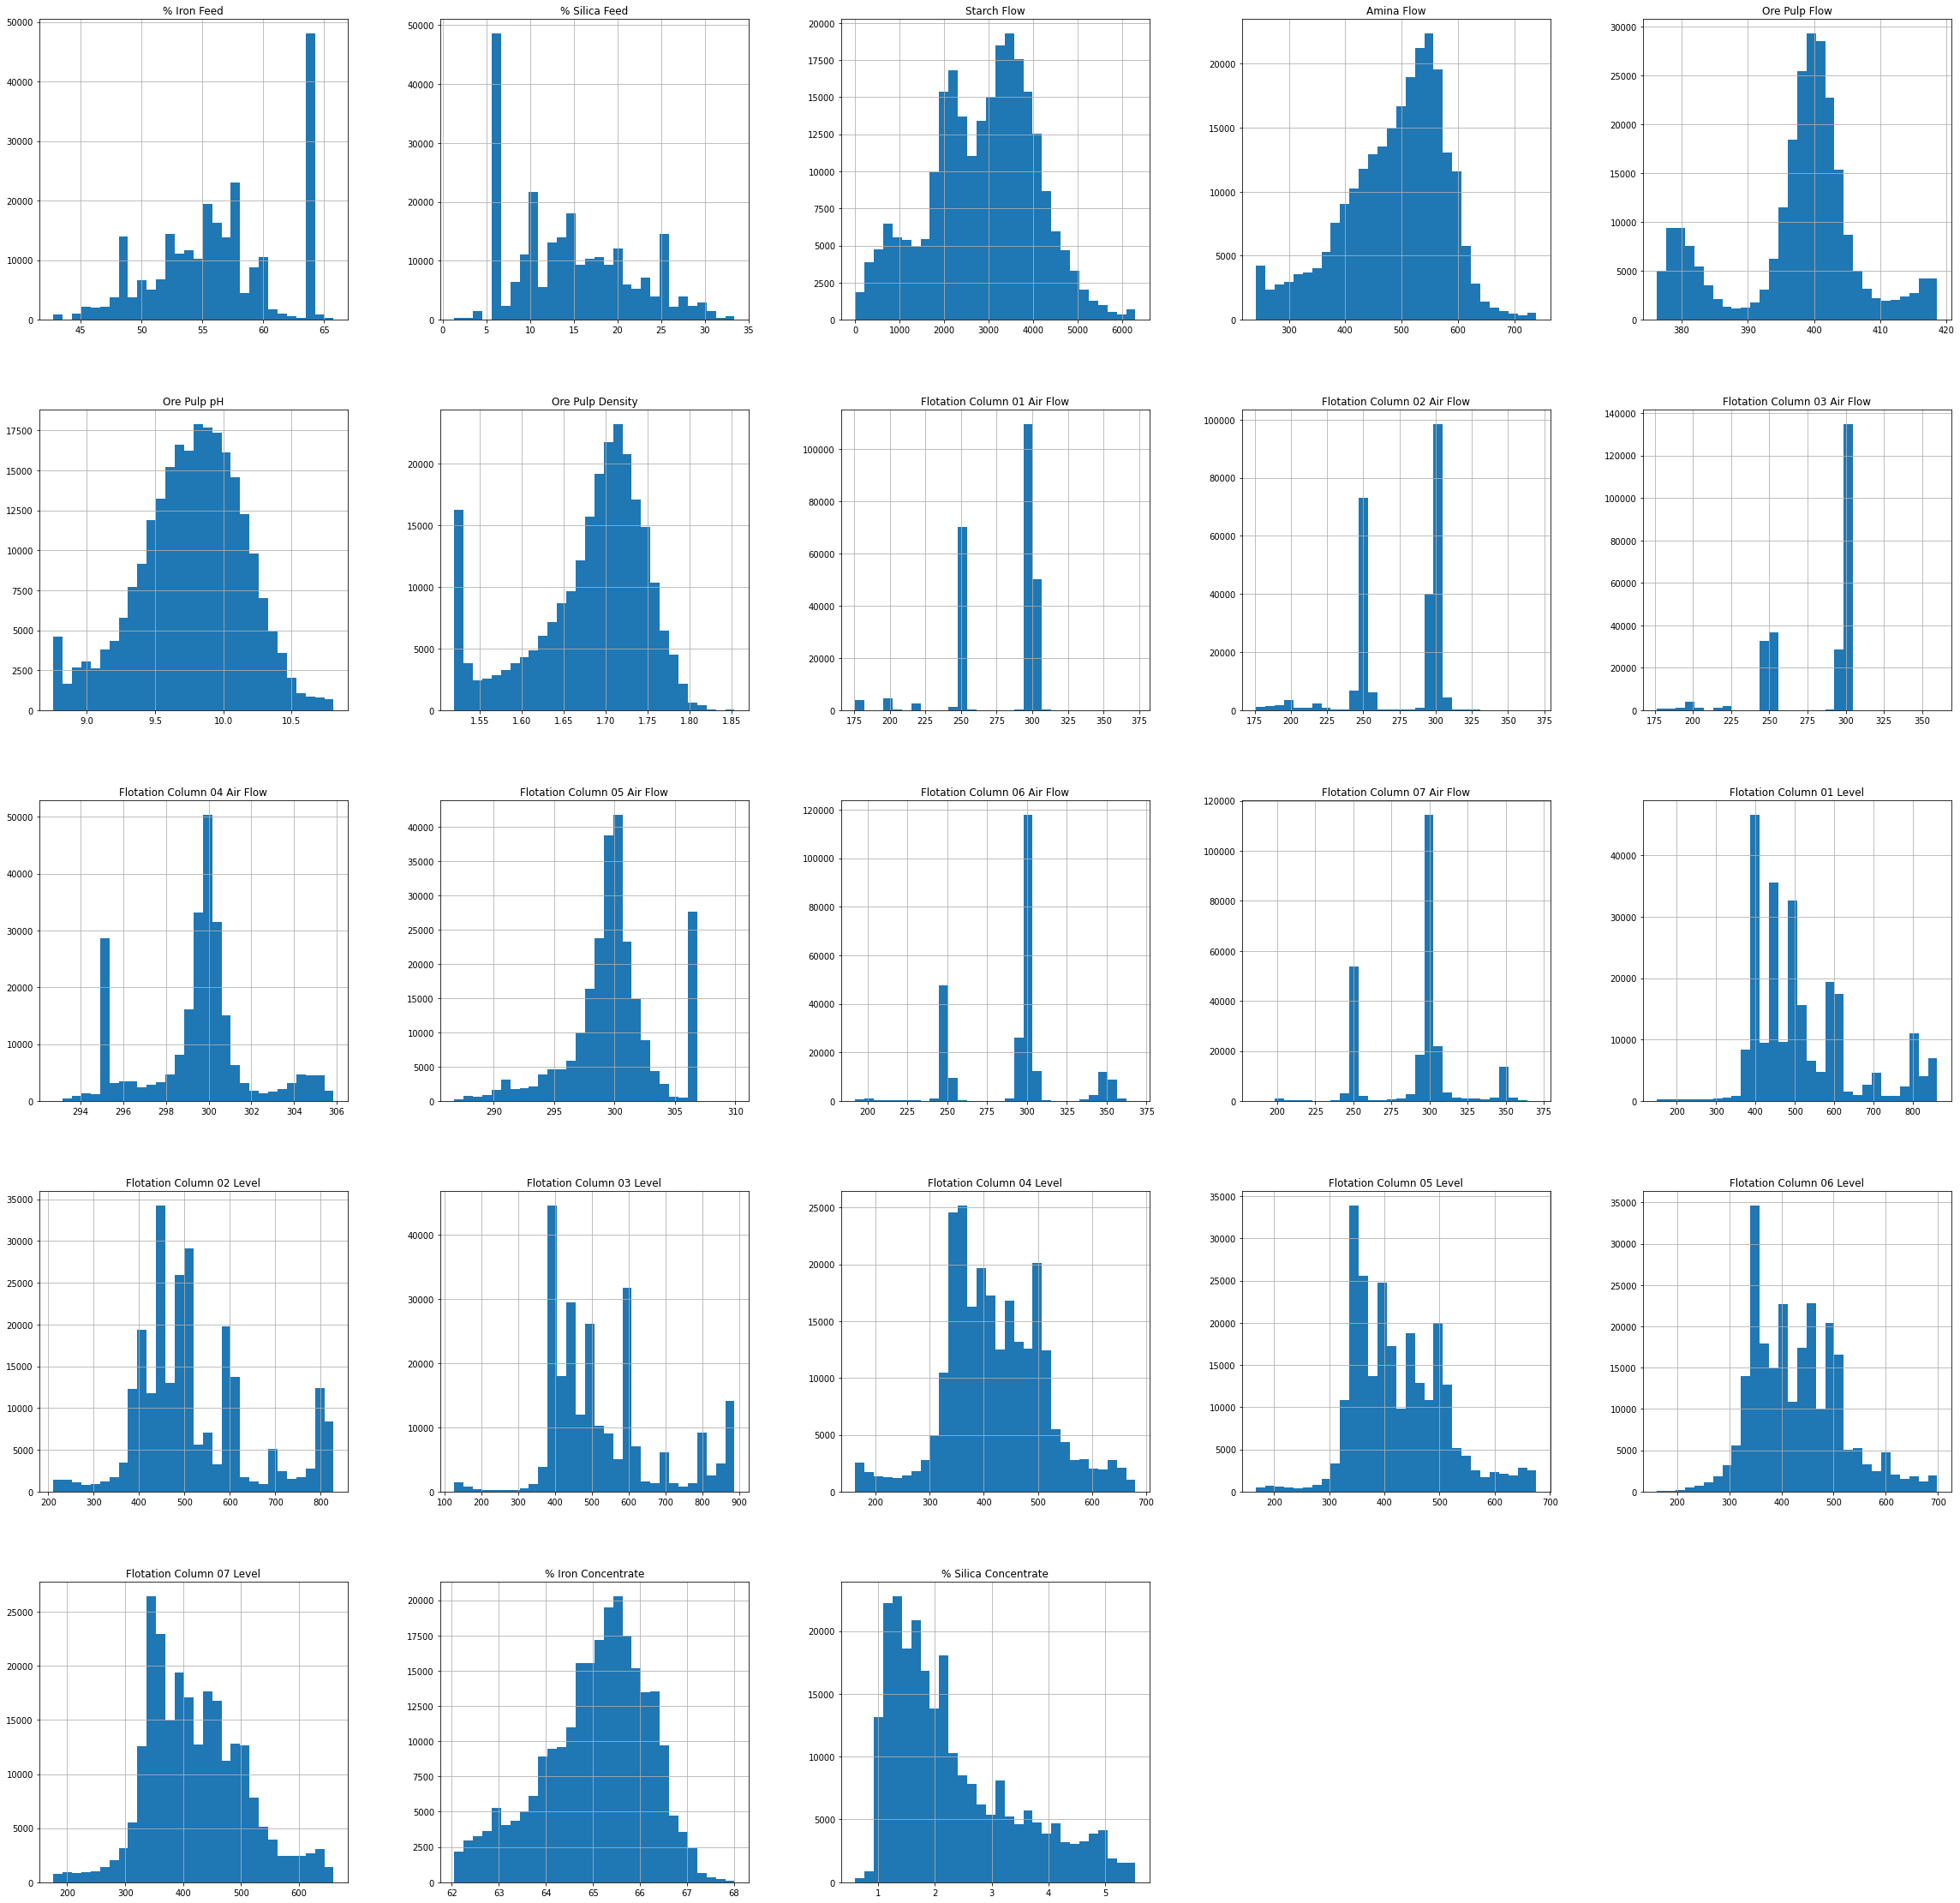

In [11]:
#plot histograms
mining_dataset.hist(bins = 30, figsize = (40,40))
plt.show()

In [12]:
mining_dataset.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971879,0.028536,-0.088560,0.165104,0.007732,-0.125708,-0.062017,-0.170304,-0.061894,...,-0.016518,0.029802,0.021175,0.015330,0.016884,0.024215,0.004123,0.026509,0.055953,-0.077242
% Silica Feed,-0.971879,1.000000,-0.016509,0.078874,-0.154769,0.007966,0.104354,0.091617,0.183804,0.084101,...,0.046091,-0.038427,-0.037154,-0.022656,-0.034654,-0.044467,-0.020659,-0.047162,-0.044536,0.072741
Starch Flow,0.028536,-0.016509,1.000000,0.261936,0.045195,0.269614,0.231514,0.195913,0.192732,0.187957,...,0.202981,-0.302348,-0.286091,-0.309007,-0.012338,-0.056712,-0.076913,-0.039099,0.071705,-0.068425
Amina Flow,-0.088560,0.078874,0.261936,1.000000,0.219510,0.124580,0.659037,0.112228,0.124920,0.102841,...,0.081677,-0.270907,-0.236695,-0.288757,-0.183257,-0.215123,-0.209728,-0.171090,-0.111626,0.157914
Ore Pulp Flow,0.165104,-0.154769,0.045195,0.219510,1.000000,0.120868,0.013025,-0.141833,-0.123071,-0.144828,...,-0.147193,-0.009224,-0.008767,-0.056181,-0.011167,0.001120,-0.018354,0.016490,0.084750,0.008800
Ore Pulp pH,0.007732,0.007966,0.269614,0.124580,0.120868,1.000000,0.115820,0.162983,0.145715,0.193488,...,0.178133,-0.167147,-0.155168,-0.140769,0.045862,0.011823,-0.079614,0.018270,0.192172,-0.147040
Ore Pulp Density,-0.125708,0.104354,0.231514,0.659037,0.013025,0.115820,1.000000,-0.004308,0.027148,-0.030928,...,-0.052540,-0.112144,-0.093552,-0.150031,-0.087702,-0.141692,-0.105513,-0.086563,0.014686,0.047434
Flotation Column 01 Air Flow,-0.062017,0.091617,0.195913,0.112228,-0.141833,0.162983,-0.004308,1.000000,0.854197,0.955226,...,0.658152,-0.444532,-0.429120,-0.373051,-0.063860,-0.093660,-0.125662,-0.113067,0.098745,-0.219615
Flotation Column 02 Air Flow,-0.170304,0.183804,0.192732,0.124920,-0.123071,0.145715,0.027148,0.854197,1.000000,0.866845,...,0.592848,-0.438129,-0.429289,-0.369541,-0.077384,-0.114253,-0.125018,-0.115919,0.059163,-0.168891
Flotation Column 03 Air Flow,-0.061894,0.084101,0.187957,0.102841,-0.144828,0.193488,-0.030928,0.955226,0.866845,1.000000,...,0.661211,-0.444087,-0.424623,-0.366290,-0.048342,-0.065661,-0.106111,-0.087370,0.100426,-0.219534


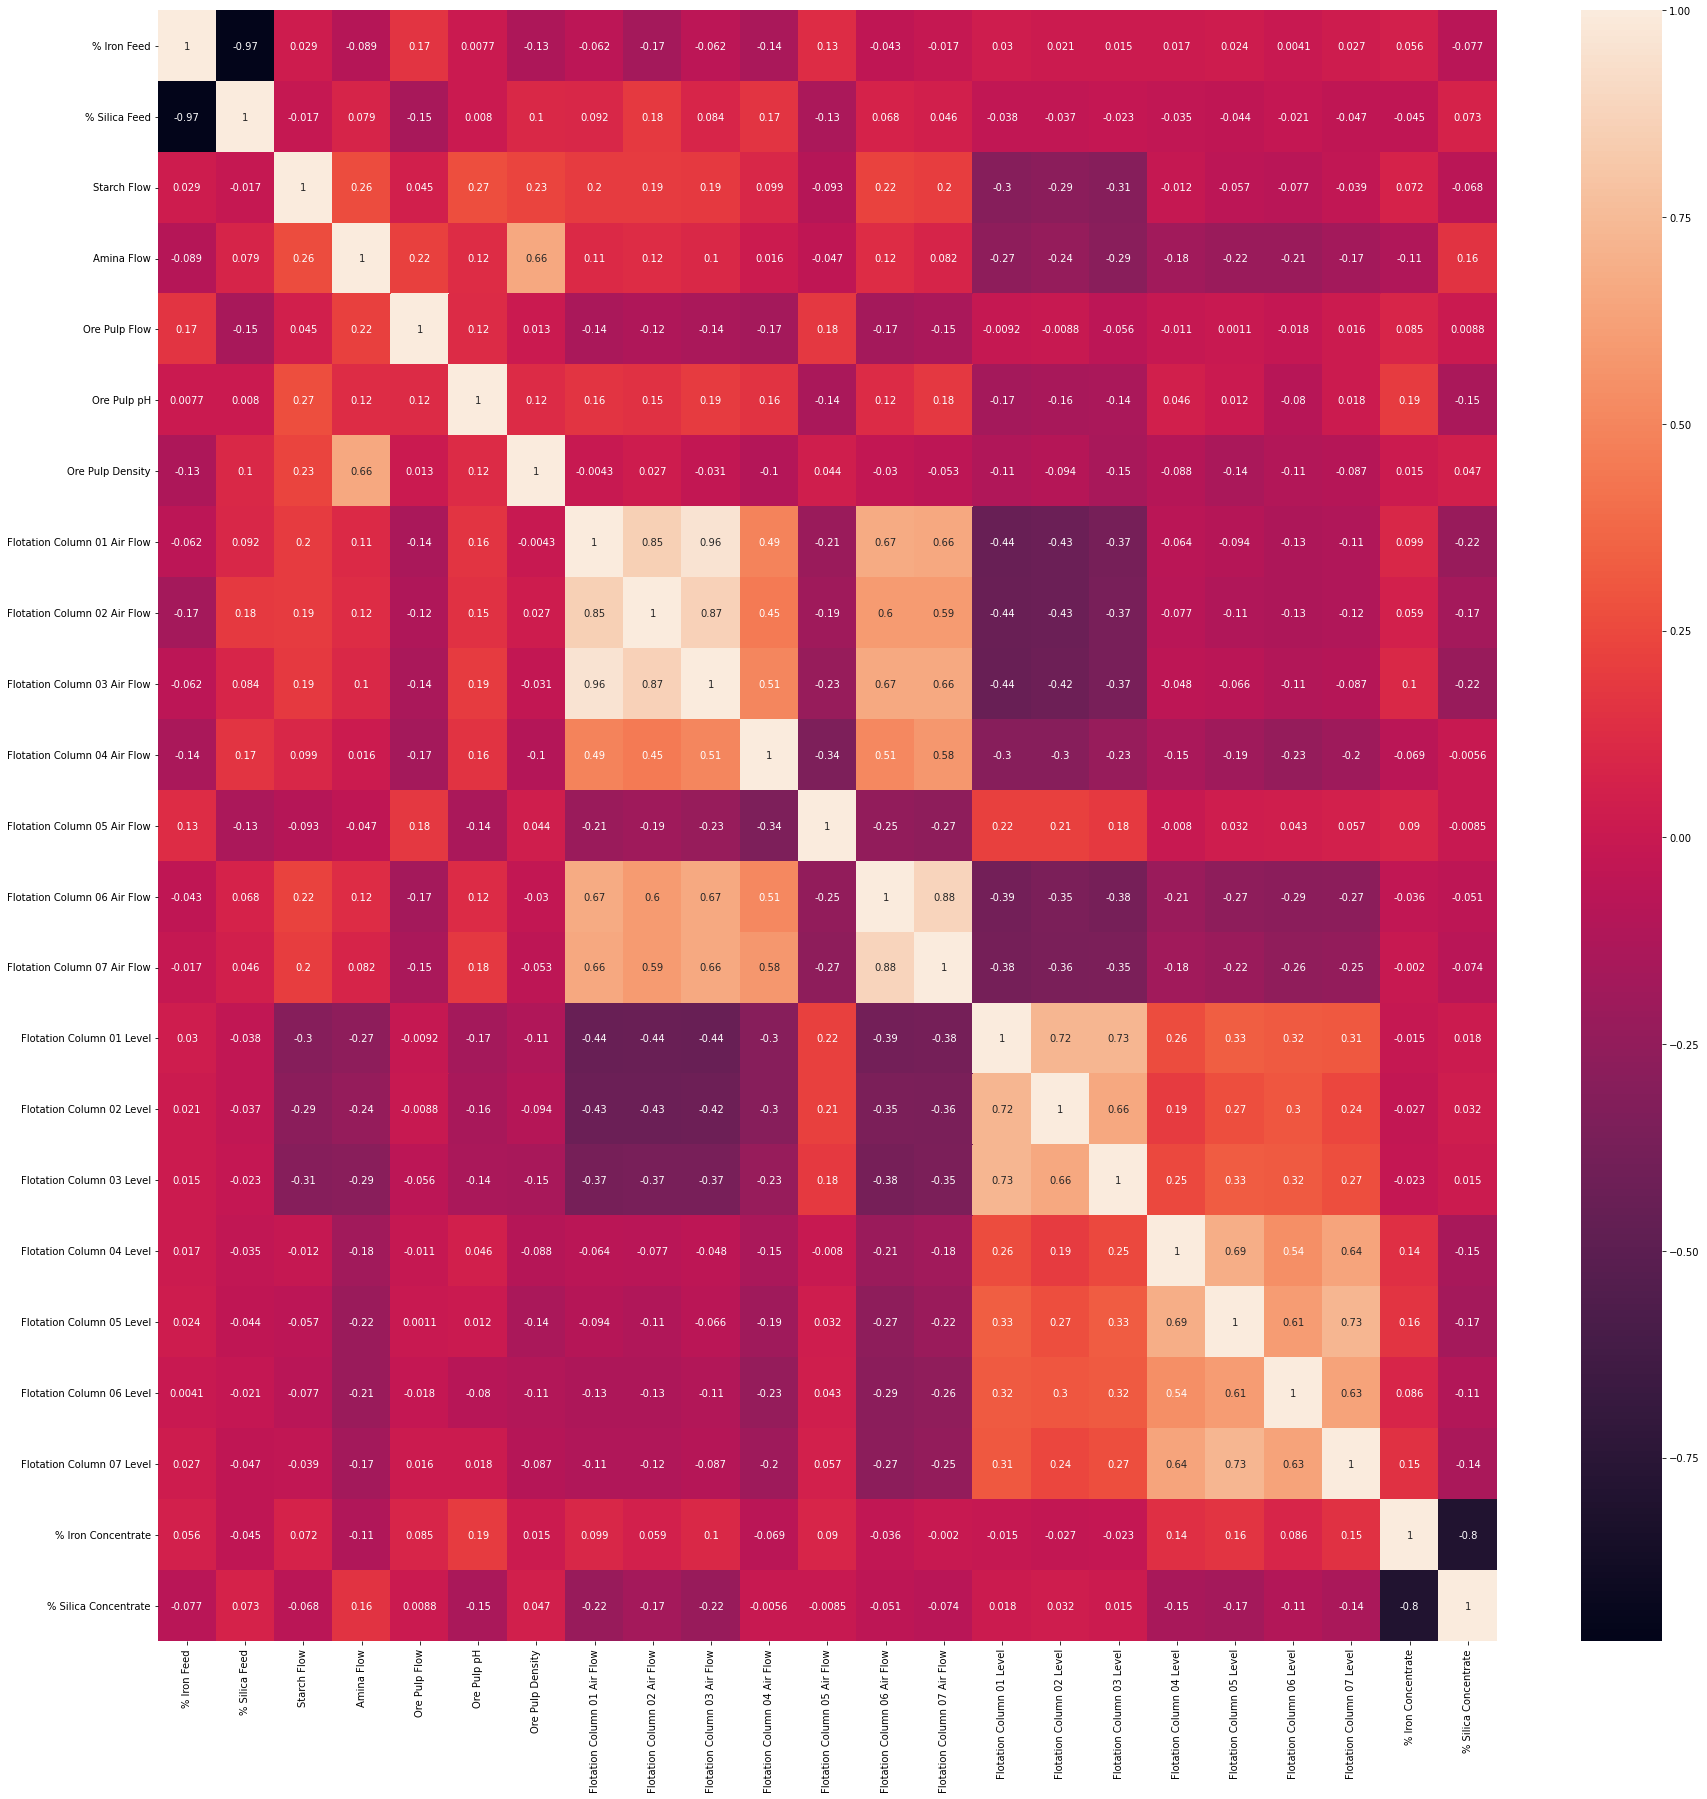

In [13]:
#obtain the correlation matrix
plt.figure(figsize = (30,30))
sns.heatmap(mining_dataset.corr(), annot = True)


In [19]:
#Observation: % Silica Concentrate, % Iron Concentrate are inversely related.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


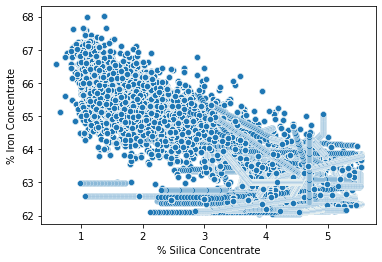

In [15]:
#verify inverse correlation
sns.scatterplot(mining_dataset['% Silica Concentrate'], mining_dataset['% Iron Concentrate'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


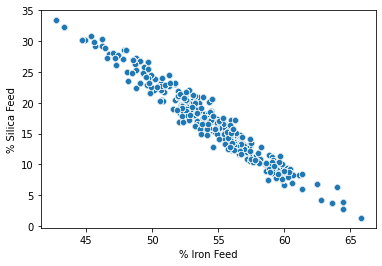

In [16]:
sns.scatterplot(mining_dataset['% Iron Feed'], mining_dataset['% Silica Feed'])

In [17]:
mining_dataset

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.20,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.20,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.20,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.20,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245695,49.75,23.20,2961.490000,452.658667,381.784667,9.615990,1.654507,300.351000,295.703667,298.312667,...,321.464444,404.055667,523.933667,880.286833,331.448333,500.245000,424.037667,400.798000,64.27,1.71
245696,49.75,23.20,2851.376667,470.843333,384.250000,9.617760,1.654413,299.978667,304.478333,301.176667,...,335.351222,417.104667,548.184333,883.347000,388.821000,482.577333,338.373000,371.803333,64.27,1.71
245697,49.75,23.20,2729.876667,463.040667,383.073667,9.619523,1.654070,302.416667,299.060000,299.929000,...,291.529000,386.853000,546.765000,870.141667,435.600333,488.983667,420.578667,366.426333,64.27,1.71
245698,49.75,23.20,2698.756667,460.303667,384.490667,9.620873,1.653653,302.603000,299.953333,299.483667,...,285.945000,395.502667,443.776333,872.247333,416.832667,495.943333,437.163000,417.842667,64.27,1.71


In [18]:
#data preparation
df_iron = mining_dataset.drop(columns = '% Silica Concentrate')
df_silica_target = mining_dataset['% Silica Concentrate']

In [19]:
df_iron.shape #training dataset without target variable

(245324, 22)

In [20]:
df_silica_target.shape #target variable

(245324,)

In [21]:
#convert to numpy arrays
df_iron = np.array(df_iron)
df_silica_target = np.array(df_silica_target)

In [22]:
#reshaping the array
df_silica_target = df_silica_target.reshape(-1,1)
df_silica_target.shape

(245324, 1)

In [23]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x_scaler = StandardScaler()
X = x_scaler.fit_transform(df_iron)

y_scaler = StandardScaler()
y = y_scaler.fit_transform(df_silica_target)


In [24]:
#split the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
print('X_train shape:'+ str(X_train.shape) + '\nX_test shape: ' + str(X_test.shape)+ ' \ny_train shape: '+ str(y_train.shape) + '\ny_test shape: ' + str(y_test.shape))

X_train shape:(196259, 22)
X_test shape: (49065, 22) 
y_train shape: (196259, 1)
y_test shape: (49065, 1)


In [26]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

LinearRegModel = LinearRegression()
LinearRegModel.fit(X_train, y_train)

LinearRegModel_Accuracy = LinearRegModel.score(X_test, y_test)
LinearRegModel_Accuracy

0.6792022790075986

In [27]:
#Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel = DecisionTreeRegressor()
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
#Evalate the Model
DecisionTree_Accuracy = DecisionTreeModel.score(X_test, y_test)
DecisionTree_Accuracy

0.9813250589291577

In [31]:
#Random Forest Model
#Many Decision Trees make up a random forest model which is an ensemble model. Predictions made by each decision tree are averaged to get the prediction of random forest model.

from sklearn.ensemble import RandomForestRegressor
RandomForest_Model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_Model.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=10)

In [32]:
#Evaluate accuracy
RandomForest_Accuracy = RandomForest_Model.score(X_test, y_test)
RandomForest_Accuracy

0.8901868081287425

In [33]:
#Neural Network for Regression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim = 22, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500,activation = 'relu'))
ANN_model.add(Dropout(0.1)) 
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation = 'linear'))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               5750      
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              501000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0

In [34]:
history = ANN_model.fit(X_train, y_train, epochs = 5, validation_split= 0.2)

Epoch 1/5
4907/4907 [==============================] - 25s 4ms/step - loss: 0.2085 - val_loss: 0.1543
Epoch 2/5
4907/4907 [==============================] - 22s 4ms/step - loss: 0.1423 - val_loss: 0.1140
Epoch 3/5
4907/4907 [==============================] - 21s 4ms/step - loss: 0.1185 - val_loss: 0.0982
Epoch 4/5
4907/4907 [==============================] - 21s 4ms/step - loss: 0.1019 - val_loss: 0.0885
Epoch 5/5
4907/4907 [==============================] - 21s 4ms/step - loss: 0.0956 - val_loss: 0.0777


In [35]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

1534/1534 [==============================] - 4s 2ms/step - loss: 0.0788
Accuracy : 0.921163335442543


In [36]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

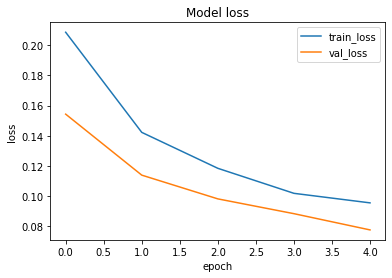

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [38]:
#From the above results, we see that the decision tree model performs better. 

Text(0, 0.5, ' True Value')

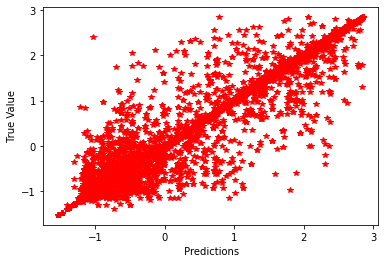

In [40]:
#Plotting Predictions vs. True Value 
y_predict = DecisionTreeModel.predict(X_test)
plt.plot(y_predict, y_test, '*', color = 'r')
plt.xlabel(' Predictions')
plt.ylabel(' True Value')

In [49]:
y_predict=y_predict.reshape(-1,1)
y_predict.shape

(49065, 1)

Text(0, 0.5, 'True Values')

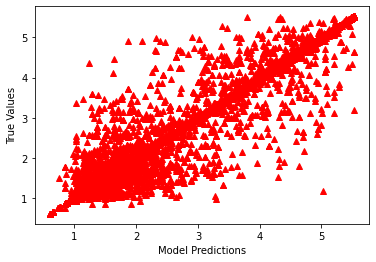

In [50]:
y_predict_orig = y_scaler.inverse_transform(y_predict)
y_test_orig = y_scaler.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [51]:
#Calculate Regression KPIs

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.154 
MSE = 0.023599469425178057 
MAE = 0.023673081785275146 
R2 = 0.9813250589291577 
Adjusted R2 = 0.981316681442441
